We'll be answering the following questions along the way:
- 1.) What was the change in price of the stock over time?
- 2.) What was the daily return of the stock on average?
- 3.) What was the moving average of the various stocks?
- 4.) What was the correlation between different stocks' closing prices?
- 4.) What was the correlation between different stocks' daily returns?
- 5.) How much value do we put at risk by investing in a particular stock?
- 6.) How can we attempt to predict future stock behavior?

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
import pandas_datareader.data as web

import datetime

In [4]:
from __future__ import division #so u dont have to worry about floats

In [5]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [9]:
end = datetime.datetime.now()
start = datetime.datetime(end.year-1,end.month,end.day)

In [11]:
for stock in tech_list:
    globals()[stock] = web.get_data_yahoo(stock,start,end)

- What globals()[stock] does, is take each stock ticker and turn it into a global variable and sets it as the dataframe name.

In [13]:
AAPL.head()

Open        High         Low       Close    Volume  \
Date                                                                   
2015-12-28  107.589996  107.690002  106.180000  106.820000  26704200   
2015-12-29  106.959999  109.430000  106.860001  108.739998  30931200   
2015-12-30  108.580002  108.699997  107.180000  107.320000  25213800   
2015-12-31  107.010002  107.029999  104.820000  105.260002  40635300   
2016-01-04  102.610001  105.370003  102.000000  105.349998  67649400   

             Adj Close  
Date                    
2015-12-28  104.495069  
2015-12-29  106.373279  
2015-12-30  104.984187  
2015-12-31  102.969025  
2016-01-04  103.057063

In [14]:
AAPL.describe()

Open        High         Low       Close        Volume  \
count  252.000000  252.000000  252.000000  252.000000  2.520000e+02   
mean   104.360952  105.279246  103.533611  104.451508  3.854104e+07   
std      7.434753    7.405816    7.524514    7.494169  1.698451e+07   
min     90.000000   91.669998   89.470001   90.339996  1.142440e+07   
25%     97.295000   98.205000   96.542502   97.137499  2.701110e+07   
50%    105.494999  106.279999  104.794998  105.694999  3.374060e+07   
75%    110.090002  111.114998  109.262499  110.417503  4.451040e+07   
max    118.180000  118.690002  117.449997  118.250000  1.333697e+08   

        Adj Close  
count  252.000000  
mean   103.408069  
std      7.862711  
min     89.394274  
25%     95.808918  
50%    104.171987  
75%    109.959997  
max    117.645979

In [15]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-12-28 to 2016-12-23
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


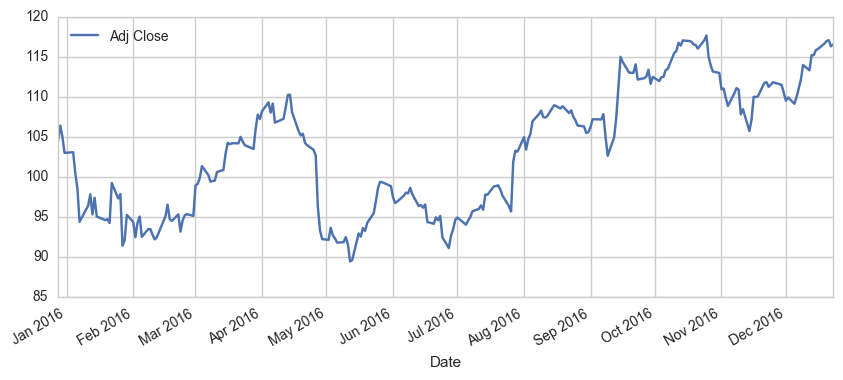

In [16]:
AAPL['Adj Close'].plot(legend = True, figsize=(10,4))

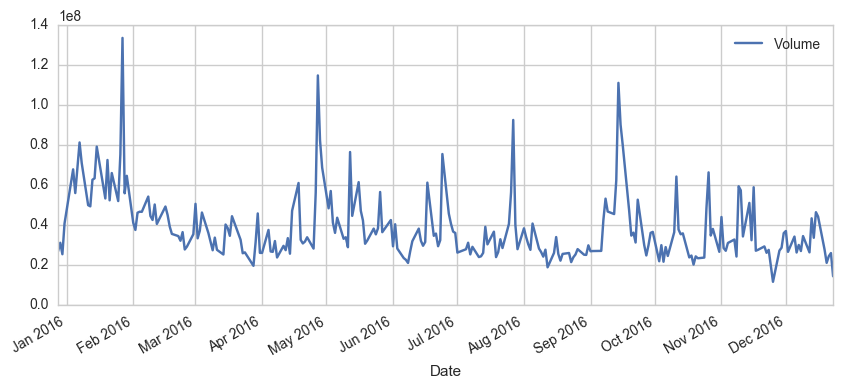

In [17]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.
For more info on the moving average check out the following links:
1.) http://www.investopedia.com/terms/m/movingaverage.asp
2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [18]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


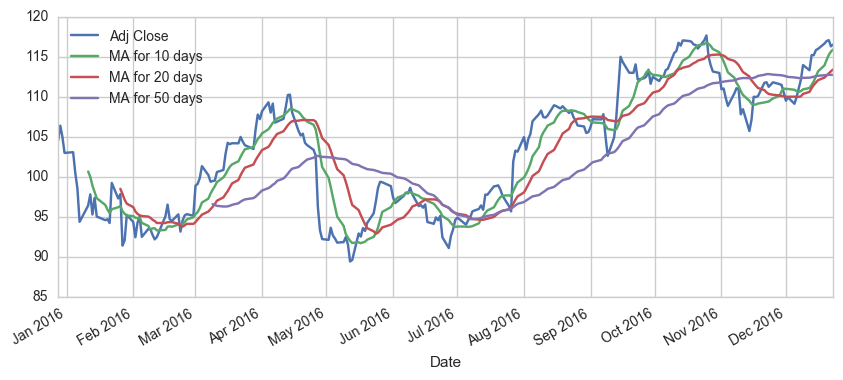

In [22]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days',
      'MA for 50 days']].plot(subplots = False, figsize =(10,4) )

Section 2 - Daily Return Analysis
- Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

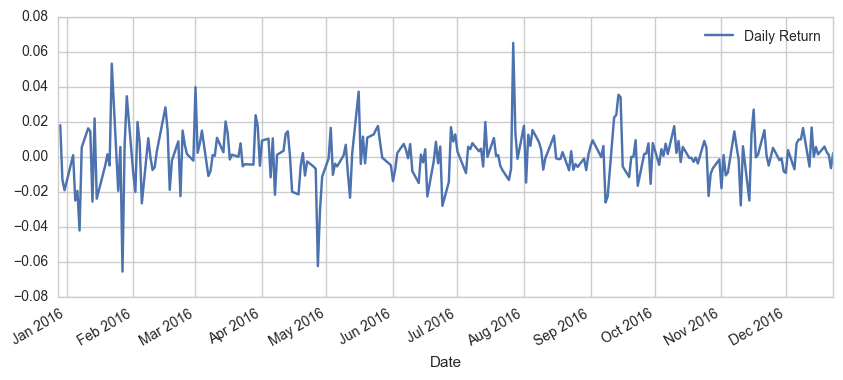

In [23]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True)

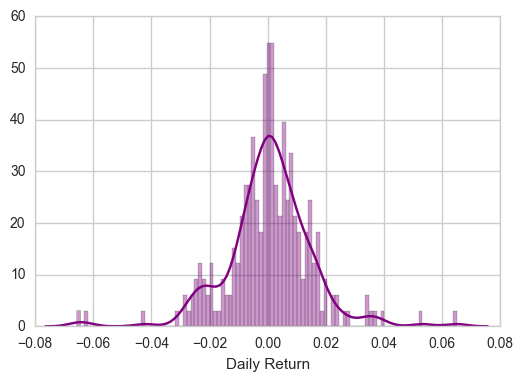

In [24]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [30]:
closing_df = web.get_data_yahoo(tech_list,start,end)['Adj Close']

In [32]:
closing_df.head()

AAPL        AMZN        GOOG       MSFT
Date                                                     
2015-12-28  104.495069  675.200012  762.510010  54.455724
2015-12-29  106.373279  693.969971  776.599976  55.039699
2015-12-30  104.984187  689.070007  771.000000  54.806110
2015-12-31  102.969025  675.890015  758.880005  53.998276
2016-01-04  103.057063  636.989990  741.840027  53.336436

Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [33]:
tech_rets = closing_df.pct_change()

In [34]:
tech_rets.head()

AAPL      AMZN      GOOG      MSFT
Date                                              
2015-12-28       NaN       NaN       NaN       NaN
2015-12-29  0.017974  0.027799  0.018478  0.010724
2015-12-30 -0.013059 -0.007061 -0.007211 -0.004244
2015-12-31 -0.019195 -0.019127 -0.015720 -0.014740
2016-01-04  0.000855 -0.057554 -0.022454 -0.012257

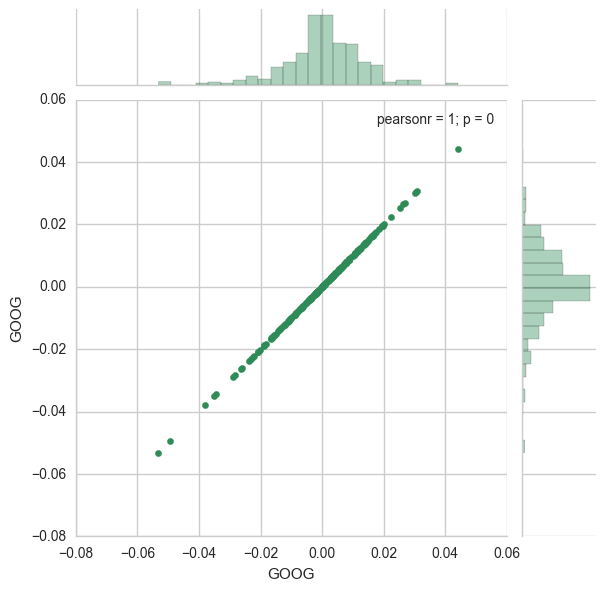

In [35]:
sns.jointplot('GOOG', 'GOOG', tech_rets,kind= 'scatter',color='seagreen')

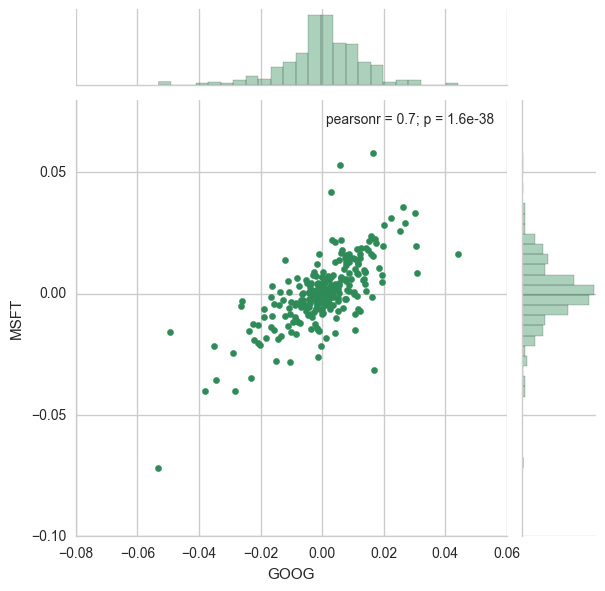

In [37]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter', color = 'seagreen')

Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:
url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient
But for a quick intuitive sense, check out the picture below.

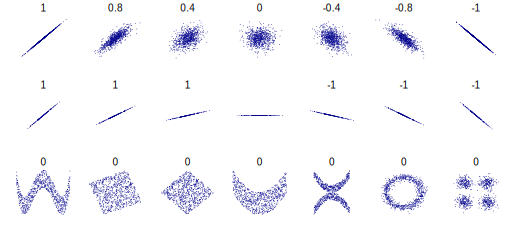

In [38]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

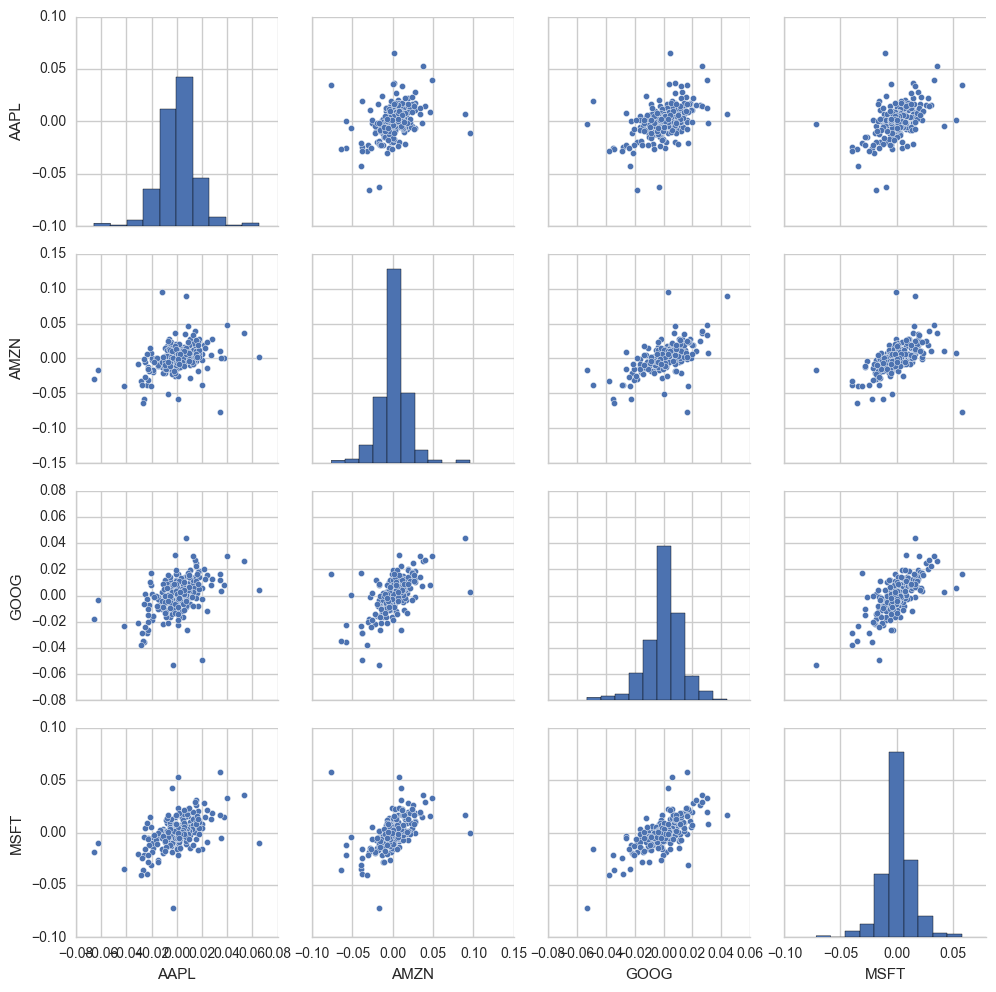

In [39]:
sns.pairplot(tech_rets.dropna())

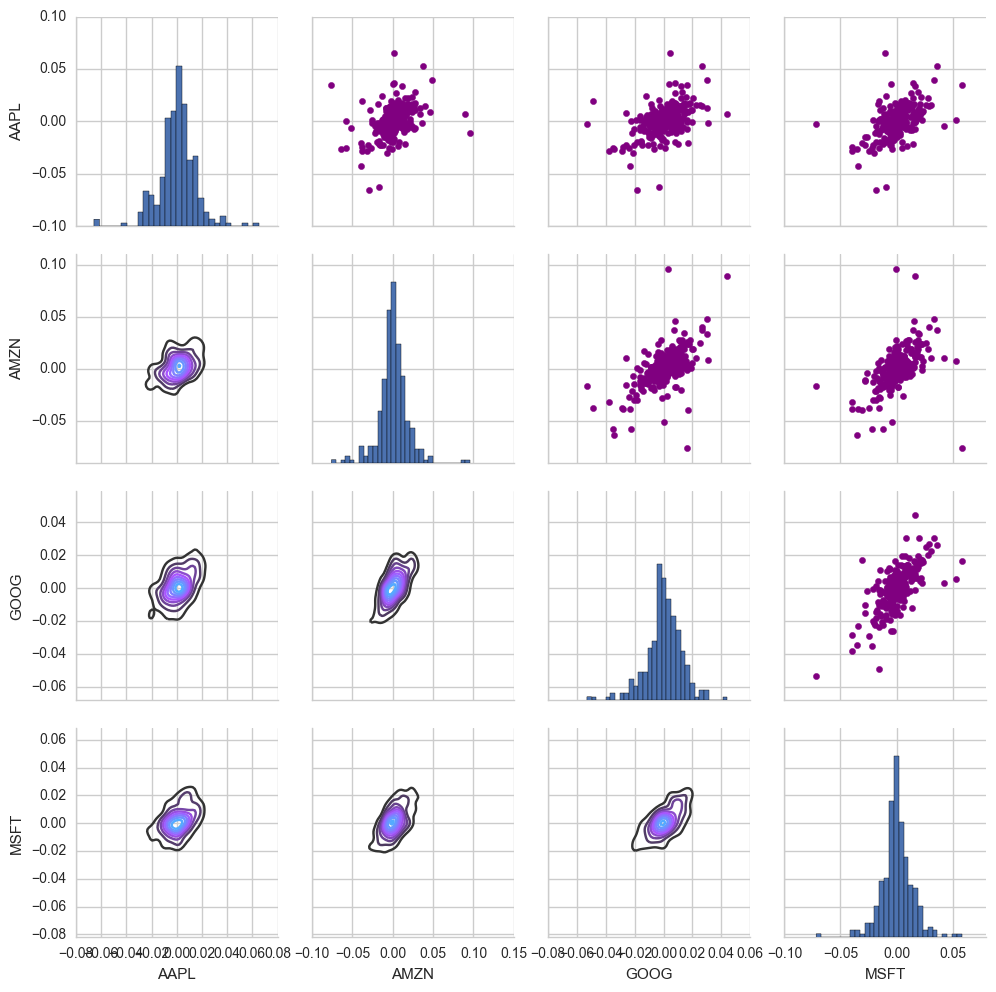

In [40]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot,cmap= 'cool_d')

returns_fig.map_diag(plt.hist,bins=30)

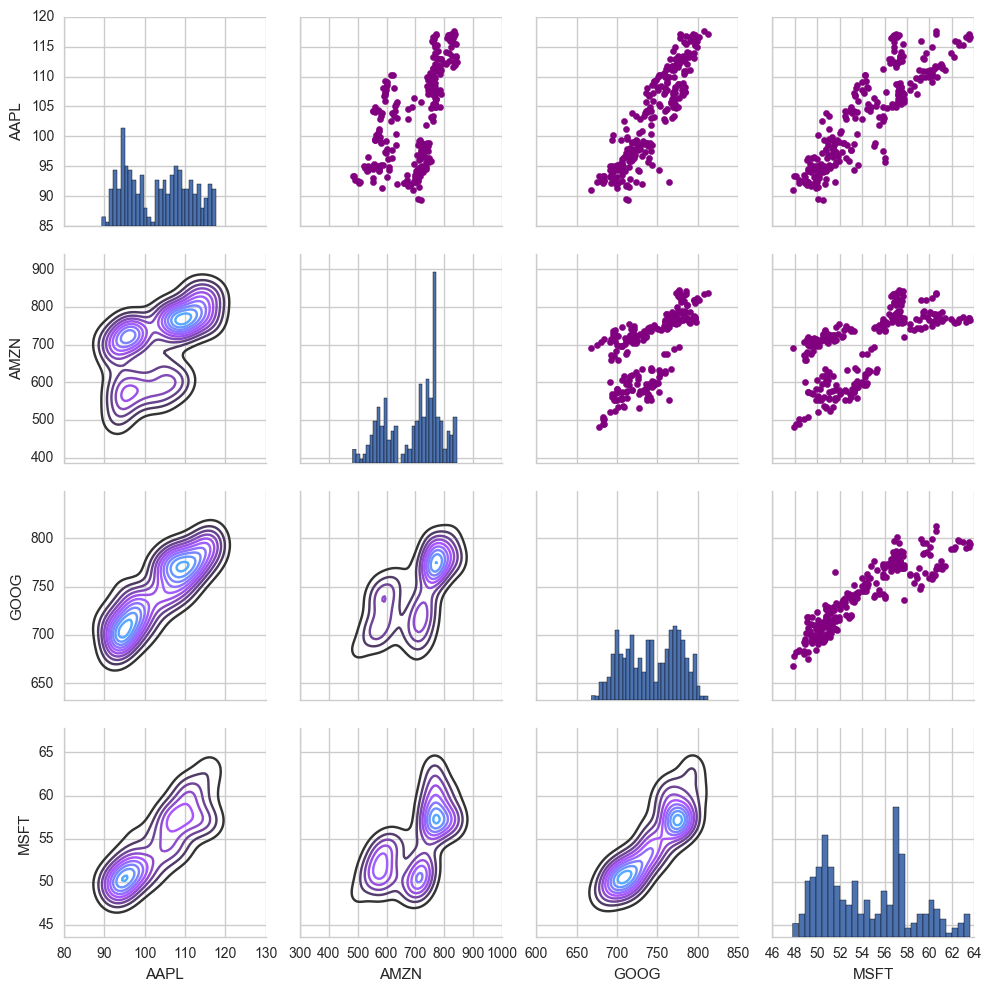

In [41]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot,cmap= 'cool_d')

returns_fig.map_diag(plt.hist,bins=30)

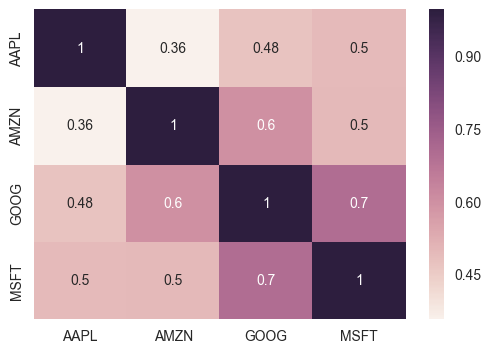

In [47]:
sns.heatmap(tech_rets.dropna().corr(),annot=True)

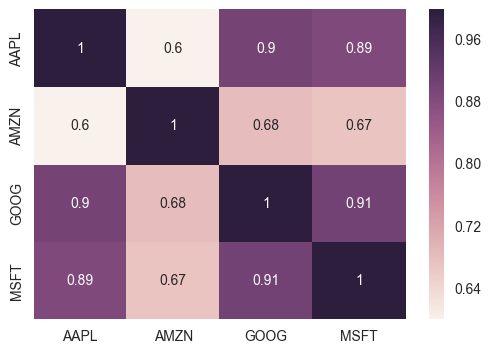

In [48]:
sns.heatmap(closing_df.corr(),annot = True)

# Data Analysis 4 Stocks and Risk

In [49]:
rets = tech_rets.dropna()

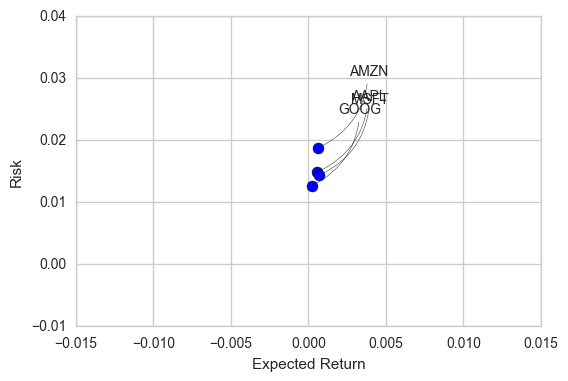

In [51]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


# Value at Risk
- Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

Value at risk using the "bootstrap" method

For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

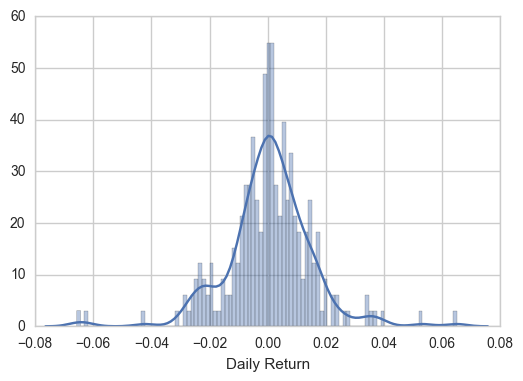

In [52]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

In [53]:
rets.head()

AAPL      AMZN      GOOG      MSFT
Date                                              
2015-12-29  0.017974  0.027799  0.018478  0.010724
2015-12-30 -0.013059 -0.007061 -0.007211 -0.004244
2015-12-31 -0.019195 -0.019127 -0.015720 -0.014740
2016-01-04  0.000855 -0.057554 -0.022454 -0.012257
2016-01-05 -0.025059 -0.005024  0.000998  0.004562

In [54]:
rets['AAPL'].quantile(0.05)

-0.023107282341668645

The above means that 95% of the time, our worst day would be the loss presented above about 2.3%

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$
Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp
To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [55]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']


In [65]:
def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        
        shock[x] = np.random.normal(loc= mu*dt, scale = sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [66]:
GOOG.head()

Open        High         Low       Close   Volume  \
Date                                                                  
2015-12-28  752.919983  762.989990  749.520020  762.510010  1515300   
2015-12-29  766.690002  779.979980  766.429993  776.599976  1765000   
2015-12-30  776.599976  777.599976  766.900024  771.000000  1293300   
2015-12-31  769.500000  769.500000  758.340027  758.880005  1489600   
2016-01-04  743.000000  744.059998  731.257996  741.840027  3272800   

             Adj Close  
Date                    
2015-12-28  762.510010  
2015-12-29  776.599976  
2015-12-30  771.000000  
2015-12-31  758.880005  
2016-01-04  741.840027

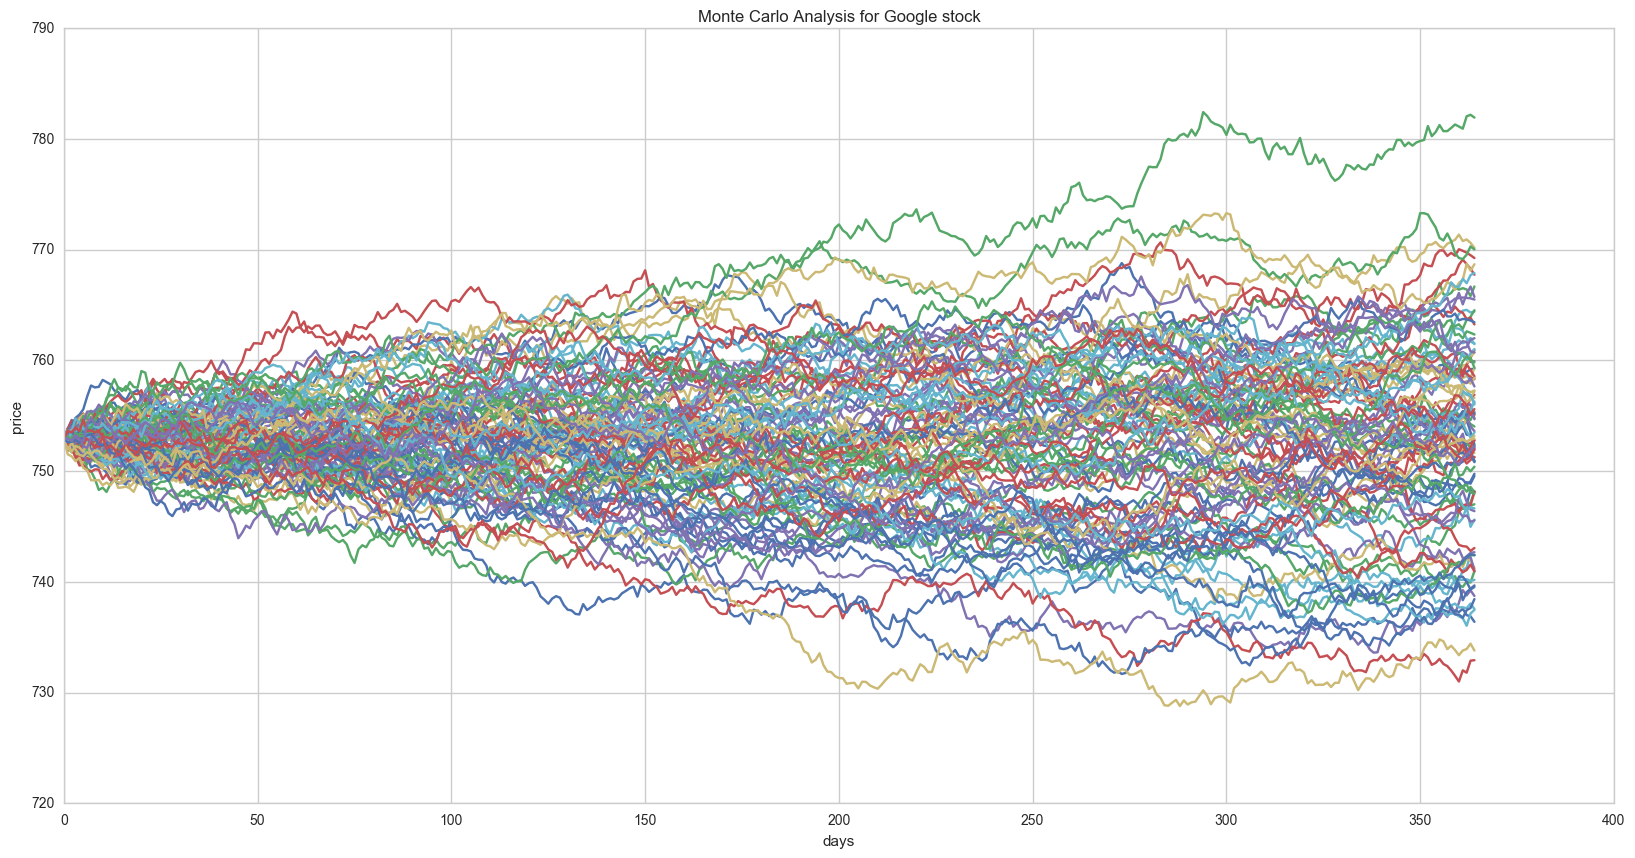

In [67]:
plt.figure(figsize=(20,10))
plt.xlabel("days")
plt.ylabel("price")
plt.title("Monte Carlo Analysis for Google stock")
 
start_price = 752.92

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price, days,mu,sigma))


   

In [68]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]


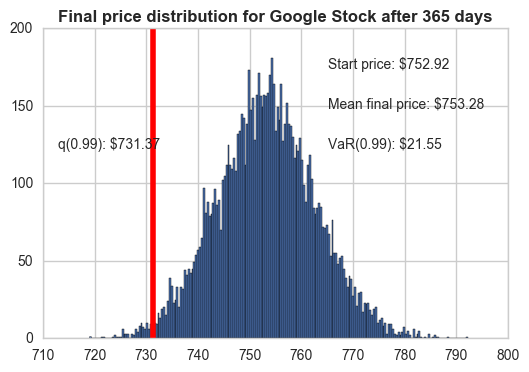

In [69]:
q = np.percentile(simulations,1)

plt.hist(simulations, bins=200)

# Starting Price
plt.figtext(0.6,0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, 'Mean final price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $21.55 for every investment of 752.92 (the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $21.55 at risk 99% of the time from our Monte Carlo Simulation.